# sklearn 初体验

<details>
    <summary><i>本文参考链接如下&lt;展开&gt; </i></summary>
    
---
    
- [CSDN-sklearn快速入门教程：（二）线性回归](https://blog.csdn.net/cauchy7203/article/details/107148575)
- [sklearn中文参考手册](https://sklearn.apachecn.org/?q=)
- [numpy官方参考手册](https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-attributes)
- [LaTex参考手册](https://www.zybuluo.com/codeep/note/163962#cmd-markdown-%E5%85%AC%E5%BC%8F%E6%8C%87%E5%AF%BC%E6%89%8B%E5%86%8C)
- [有监督学习-线性回归原理与python代码](https://blog.csdn.net/weixin_37825814/article/details/113809423?utm_source=app&app_version=4.12.0&code=app_1562916241&uLinkId=usr1mkqgl919blen)
</details>

## 初次接触线性回归模型
对于一元线性回归公式来说
$$\hat{y}(w,x)=w_0+w_1x_1+w_2x_2+...+w_nx_n$$
给定的数据集中，$x_i$ 表示一组数据的各个属性，$y$表示对应的数据输出值，`LinearRegression`模型的目的就是根据输入多组的$x$和对应的$y$来求出向量$w$，拟合出一个对应的函数来达到预测的目的。

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
X=np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
Y=np.dot(X,np.array([2,3]))+5 #这里是点积 Y= 2*X_0+3*X_1+5
# 构造线性回归模型
reg=LinearRegression()
reg.fit(X,Y)
reg.coef_ #拟合的斜率向量[w1...wn]
reg.intercept_ #拟合的末项w0
reg.predict(np.array([[9,10]]))# 预测


array([53.])

## 分析
暂时留空

## 案例：预测医疗费用
**此案例中原数据未经过清洗**

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [3]:

#导入数据
# data=pd.read_csv('../数据预处理/data/BlackFriday.csv')
data=pd.read_csv('..\回归分析\data\insurance.csv')
# data.head()
# data.describe
#数据预处理
le=LabelEncoder()
for col in data.columns:
    data[col]=le.fit_transform(data[col])  #将字符串标签数值化
# data.drop(['User_ID','Product_ID'],axis=1,inplace=True) #删除无用列
# data.describe
#分离因变量和自变量
X=data.iloc[:,:-1] #表示所有行的除去最后一列的所有数据
Y=data.iloc[:,-1] #表示所有行的最后一列数据
# X.head()
# Y.head()
#生成训练集和测试集 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
#实例化模型开始训练
reg=LinearRegression()
reg.fit(x_train,y_train)
# 对测试集生成预测结果
y_pre=reg.predict(x_test)
# 进行r2评分
r2_score(y_test,y_pre)

0.7446252612165645

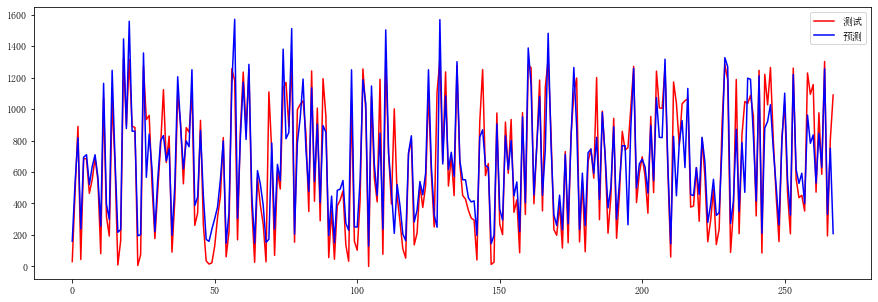

In [32]:
# 可视化测试集预测误差
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)),y_test,'r',label="测试")
plt.plot(range(len(y_test)),y_pre,'b',label="预测")
plt.legend()
plt.show()

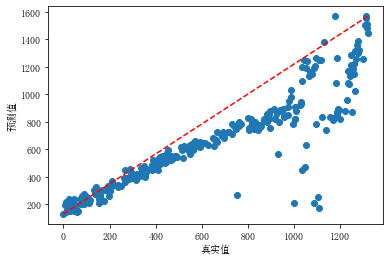

In [33]:
# 利用散点图观察预测值和真实值的离散程度
plt.scatter(y_test,y_pre)
plt.plot([y_test.min(),y_test.max()],[y_pre.min(),y_pre.max()],'r--')
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()